In [1]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

try:
    import astropy as apy
    import astropy.table
    _apy = True
    #print('Loaded astropy')
except:
    _apy = False
    #print('Could not load astropy')

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

## Customising the look of the notebook
display(HTML("<style>.container { width:95% !important; }</style>"))
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [2]:
## Adding a button to hide the Python source code
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the Python code."></form>''')

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10791: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.renebreton.org">Prof. Rene Breton</a> - Twitter <a href="https://twitter.com/BretonRene">@BretonRene</a><br>
            <a href="http://www.hep.manchester.ac.uk/u/gersabec">Dr. Marco Gersabeck</a> - Twitter <a href="https://twitter.com/MarcoGersabeck">@MarcoGersabeck</a>
        </div>
    </div>
</div>

## Syllabus

1. Probabilities and interpretations
2. **Probability distributions**
3. Parameter estimation
4. Maximum likelihood
5. Least square, chi2, correlations
6. Monte Carlo basics
7. Goodness of fit tests
8. Hypothesis testing
9. Probability and confidence level
10. Limit setting
11. Introduction to multivariate analysis techniques

# Chapter 2

## Topics

**[2.1 Probabilities and random variables](#2.1-Probabilities-and-random-variables)**
- 2.1.1 Axioms of probability
- 2.1.2 Bayes' theorem
- **Case study**: The mesmerising effect of Bayes' theorem

**[2.2 Probability distributions](#2.2-Probability-distributions)**
- 2.2.1 General probability distributions:
    - Discrete probability distribution
    - Continuous probability distribution
- 2.2.2 Some important probability distributions
    - Binomial distribution
    - Poisson distribution
    - Gaussian/Normal distribution
- 2.2.3 Gaussian distribution as limit of Poisson and Binomial distributions
- 2.2.4 Other probability distributions
    - Uniform, $\chi^2$, Student's t, Fisher's F
    - Multivariate Gaussian

## Further Reading Material

- **Cowan**: Chapter 1 - *Axioms of probability and Bayes theorem*
- **Barlow**: Chapter 7.1 - *Axioms of probability and Bayes theorem*
- **Barlow**: Chapter 3 - *Introduction to some key probability distributions (Binomial, Poisson and Gaussian)*
- **Cowan**: Chapter 2 - *Introduction to some key probability distributions (Binomial, Poisson and Gaussian)*
- Wikipedia page on [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem)

## 2.1 Probabilities and random variables

### 2.1.1 Axioms of probability

When repeating a measurement the result may change in an unforeseable manner. This is the characteristic of a random system. The degree of randomness can be quantified with the concept of probability.

We will denote the symbol $\cap$ as the *intersection*, i.e. the 'and' logical operator (both variables need to be true to return true), and the symbol $\cup$ as the *union*, i.e. the 'or' logical operator (either or both variables need to be true to return true). The symbol $\subset$ will define a *subset*, i.e. set contained within a bigger set.

Let us define the probability following Andrey Kolmogorov's probability theory (1933).

We have a set of possible results $\Omega = \{E_1, E_2, \dots \}$. To each subset $A$ of $\Omega$ such that $A \subset \Omega$, one can assign a real number, $P(A)$, called probability and satisfying the three *axioms of probability*:

1. For each subset $A$ such that $A \subset \Omega$, $P(A) \geq 0$
2. For all disjoint subsets $A$ and $B$ (i.e. $A \cap B = \emptyset$, null intersection), $P(A \cup B) = P(A) + P(B)$ (i.e. the union of the two is simply the sum of the datasets)
3. $P(\Omega) = 1$

The following properties can be derived from these axioms:

- $P(\bar A) = 1 - P(A)$, where $\bar A$ is the complement subset, i.e. elements that are not part of $A$.
- $P(A \cup \bar A) = 1$
- $0 \leq P(A) \leq 1$
- $P(\emptyset) = 0$, where $\emptyset$ is the empty set.
- If $A \subset B$ then $P(A) \leq P(B)$
- $P(A \cup B) = P(A) + P(B) - P(A \cap B)$

<div class="example">Example 1</div>

We can use the following _Euler diagram_ to illustrate some of the above properties in a probability space.

<img src="images/1024px-Conditional_probability.svg.png" width="40%">

(Source: [Gnathan87](https://commons.wikimedia.org/wiki/User:Gnathan87), [Conditional probability](https://en.wikipedia.org/wiki/Conditional_probability#/media/File:Conditional_probability.svg), [CC0 1.0 Universal](https://creativecommons.org/publicdomain/zero/1.0/deed.en))

- $P(A) = 0.3 + 0.1 + 0.12 = 0.52$
- $P(B_2) = 0.12 + 0.04 = 0.16$
- $P(\bar A) = 0.34 + 0.1 + 0.04 = 0.48 = 1 - 0.52$
- $P(A \cup B_2) = 0.52 + 0.16 - 0.12 = 0.56$

### 2.1.2 Bayes' theorem

#### Conditional probability
The *conditional probability* of an event $A$ **given** an event $B$ is defined as the ratio of the probability of the joint events (i.e. intersection of $A$ and $B$) and the probability of event $B$:

\begin{equation}
  P(A \mid B) = \frac{P(A \cap B)}{P(B)}
\end{equation}

<div class="example">Example 1</div>

From the previous Euler diagram, we recall the probability $P(A) = 0.52$. Examining the figure, we deduce the following conditional probabilities:

- $P(A \mid B_1) = \frac{0.1}{0.1} = 1$
- $P(A \mid B_2) = \frac{0.12}{0.16} = 0.75$
- $P(A \mid B_3) = \frac{0}{0.1} = 0$
- $P(A \mid B) = \frac{0.1 + 0.12}{0.1 + 0.12 + 0.04 + 0.1} = 0.61$

#### Derivation of Bayes' theorem

Following the above definition, the conditional probability of B given A is given by:

\begin{equation}
  P(B \mid A) = \frac{P(B \cap A)}{P(A)}
\end{equation}

However, the joint probability of A and B is commutative: $P(A \cap B) = P(B \cap A)$. As a result we can combine the two conditional probabilities to obtain:

\begin{eqnarray}
  P(A \mid B) &=& \frac{P(A) P(B \mid A)}{P(B)} \\
         &=& \frac{P(A) P(B \mid A)}{\sum_i P(A_i) P(B \mid A_i)}
\end{eqnarray}

The second form comes from the law of total probability in the case where $B$ is made of multiple subsets.

This is known as **Bayes' rule (or Bayes' theorem)**. In the language of Bayesian inference we typically refer to the various terms as:

- $P: P(A \mid B)$, the posterior probability
- $I: P(A)$, the prior probability
- $L: P(B \mid A)$, the likelihood probability
- $E: P(B)$, the evidence

Therefore Bayes theorem is:

\begin{equation}
  P = \frac{I \mathcal{L}}{E}
\end{equation}

For more information, I recommend watching this [video on Bayes' Theorem by 3Blue1Brown on YouTube](https://youtu.be/HZGCoVF3YvM).

### Case study: The mesmerising effect of Bayes' theorem

One of the surprising consequences of using Bayes' theorem to correctly perform statistical inference is that in certain situations it sometimes goes against our first intuition. More often than not, this is due to not correctly accounting for the prior probability (or not including it at all).

Consider for instance the case of a certain type of cancer, which causes a rare symptom to manifest itself in all individuals suffering from it. It might be tempting to assert that if we observe the symptom, then the individual must necessarily be suffering from the said cancer. The answer, however, is that it is not 100% certain. In fact, the probability can be suprisingly low. Why? We must consider the prevalence of this symptom in the general population. It could be that other conditions also cause the same symptom or, even, that some healthy individuals display it.

To answer such kind of problem is often easier with a table of outcome. Let us imagine that 1 in 20,000 people suffer from this cancer and that the symptom is seen in 100% of patients with this particular cancer. Let us add, however, that 1 in 10,000 people who do not have this cancer also display the symptom. Therefore:

| Symptom \ Cancer | Yes | No     | Total |
|-------|-----|--------|-------|
| Yes   | 1   | 2      | 3     |
| No    | 0   | 19997  | 19997 |
| Total | 1   | 19999  | 20000 |

Recasting in a mathematical way, the question is $P({\rm cancer} | {\rm symptom})$. We can readily see that the answer is $1/3$, or 33%.

The full Bayesian calculation is:
\begin{eqnarray}
  P({\rm cancer} \mid {\rm symptom}) &=& \frac{P({\rm cancer}) P({\rm symptom} \mid {\rm cancer})}{P({\rm symptom})} \\
                                     &=& \frac{P({\rm cancer}) P({\rm symptom} \mid {\rm cancer})}{P({\rm cancer}) P({\rm symptom} \mid {\rm cancer}) + P({\rm no cancer}) P({\rm symptom} \mid {\rm no cancer})} \\
                                     &=& \frac{1/20000 \cdot 1}{1/20000 \cdot 1 + 19999/20000 \cdot 1/10000} \\
                                     &=& 0.333
\end{eqnarray}

We therefore recover the 33%.

_Note that in the above table, we have rounded up the number of people who have symptom but no cancer to 2 in 19999 to make numbers integer values 'fractional people' is not realistic. On the other hand, for the proper Bayesion calculation, exact values can be used directly._

The earlier case study was based on a problem presented on the Wikipedia page about the [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem). Have a read for further details on the topic.

## 2.2 Probability distributions

### 2.2.1 General probability distributions

#### Discrete probability distribution

Let us consider a single observable $x$. The sample space that corresponds to some sample space $\Omega$ being the values that $x$ can assume. We can ask the question: how big is the probability to find/observe an event or subset of events?

There are other situations in which the observable $x$ can only take a limited number of values (i.e. it has a discrete rather than a continuous support). In which case, the list of probabilities of possible outcomes is given by the **probability mass function** (PMF). As per the axioms of probability, the PMF must be normalised to unity:

\begin{equation}
  \sum_{x \, \in \, \Omega} f_X(x) = 1
\end{equation}

*An example of discrete probability distribution would be the odds on rolling a dice. For a fair dice, the probability of each face is equal, therefore making their individual probabilities equal to $1/6$.*

#### Continuous probability distribution

There are other situations in which the observable $x$ is a continuous quantity. In which case, we define the **probability density function** (PDF) as probability to observe $x$ in the interval $[x,x+dx]$:

\begin{equation}
  f(x) dx \,.
\end{equation}

Because the PDF represents the probability of an event, the sum of all possible outcomes over the sample space $\Omega$ must be normalised to unity. Hence we have:

\begin{equation}
  \int_\Omega f(x) dx = 1
\end{equation}

*An example of a continuous probability distribution would be the odds of Manchester United winning the Manchester derby against Manchester City. In this case the sample space extends in the range $[0,1]$. In other situations, the sample space can be positive definite (e.g. the probability of measuring the length of an object), or even infinite.*

### 2.2.2 Some important probability distributions

In physical sciences, like in other areas of data science, drawing meaningful conclusions depends on properly understanding the data and their related sources of uncertainties. In this section, we will investigate three of the most fundamental statistical distributions which form the basis of most data science.

_**Note:** The Python module ```scipy.stats``` contains a large number of already implemented distributions, from which it is possible to extract the probability distributions (PDF/PMF) and auxiliary functions (such as the cummulative distribution function). You are not expected to use it for the course, but this might come handy some day._

#### Binomial distribution

The *binomial distribution* describes processes with a given number of identical trials with two possible outcomes. Also see [Binomial distribution on Wikipedia](https://en.wikipedia.org/wiki/Binomial_distribution).

Examples of processes following the binomial distribution are:

- Tossing a coin (head/tail)
- Quality control test (pass/fail)
- Treatement in medecine (cure/no cure)

Events are given boolean values labelled as success/yes/true/one and the complementary outcome are called failure/no/false/zero.

Let us define the following variables:
    
- $k$ the number of successes
- $n$ the number of trials/events
- $p$ the probability of an individual success.

##### Probability mass function

The binomial distribution (in this case the probability mass function) is given by:

\begin{equation}
  P(k;, n, p) = p^k (1-p)^{(n-k)} \frac{n!}{k!(n-k)!}
\end{equation}

##### Important properties

Mean: $np$

Variance: $np(1-p)$

<div class="example">Example 1</div>

Imagine that you toss a fair coin four times. What are the possible outcomes and their probability?

_In total, there are 16 possible outcomes. However, given that the order does not matter, we can group similar outcomes together, which means that there are only 5 unique outcomes._

| Outcome | Degeneracy | Probability |
| :-----: | :--------: | :---------: |
| HHHH    | 1          | 1/16        |
| HHHT    | 4          | 1/4         |
| HHTT    | 6          | 3/8         |
| HTTT    | 4          | 1/4         |
| TTTT    | 1          | 1/16        |


What is the probability of having one head out of four fair coin toss?

_The answer is $1/4$. Using the PMF:_

\begin{equation}
  P(1; 4, 0.5) = 0.5^1 (1-0.5)^{4-1} \frac{4!}{1! (4-1)!} = 0.25
\end{equation}

In [3]:
print('Example calculation in Python\n')

## Calculating the above in Python
print('Probability of getting one head out of four fair coin toss.')

## Method 1: the long way
prob = 0.5 * 0.5**3 * scipy.special.factorial(4) / scipy.special.factorial(3)
print('Method 1 (full calculation): P(1;4,0.5) = {}'.format(prob))

## Method 2: the short way
prob = scipy.stats.binom.pmf(1,4,0.5)
print('Method 2 (scipy.stats): P(1;4,0.5) = {}'.format(prob))

Example calculation in Python

Probability of getting one head out of four fair coin toss.
Method 1 (full calculation): P(1;4,0.5) = 0.25
Method 2 (scipy.stats): P(1;4,0.5) = 0.25000000000000006


**Plotting the binomial distribution**

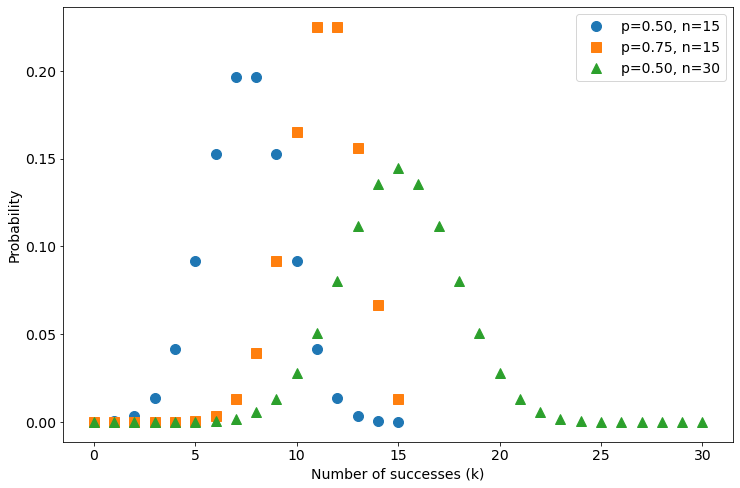

In [4]:
## Generating the subplots
fig, ax = plt.subplots(1, 1, figsize=(12,8))

## Generating the PMF for three cases. Note that we use implicit array operations instead of looping through k values.
n1 = 15
k1 = np.arange(n1+1)
p1 = 0.5
prob1 = scipy.stats.binom.pmf(k1, n1, p1)

n2 = 15
k2 = np.arange(n2+1)
p2 = 0.75
prob2 = scipy.stats.binom.pmf(k2, n2, p2)

n3 = 30
k3 = np.arange(n3+1)
p3 = 0.5
prob3 = scipy.stats.binom.pmf(k3, n3, p3)

## Plotting
_ = ax.plot(k1, prob1, '.', ms=20, label='p=0.50, n=15')
_ = ax.plot(k2, prob2, 's', ms=10, label='p=0.75, n=15')
_ = ax.plot(k3, prob3, '^', ms=10, label='p=0.50, n=30')
_ = ax.set_xlabel('Number of successes (k)')
_ = ax.set_ylabel('Probability')
_ = ax.legend()

## We save the figure
fig.savefig('./images/binomial_pmf.pdf')

#### Poisson distribution

The *Poisson distribution* describes processes in which the probability of a certain number of events occurring in a given interval of time (or space), if the average occurance rate is a known constant and the events are independent from each other. Also see [Poisson distribution on Wikipedia](https://en.wikipedia.org/wiki/Poisson_distribution).

Examples of processes following the Poisson distribution are:

- The number of letters received by a household in a day
- The number of phone calls received by a call centre between 9 and 10 am
- The number of X-ray photons received from a low-mass X-ray binary system in a 1-min window

Let us define the following variables:
    
- $k$ the number of times an event occurs in an given interval (this is an integer value)
- $\lambda$ the average event rate per interval (can be any real positive number)

##### Probability mass function
The Poisson distribution (in this case the probability mass function) is given by:

\begin{equation}
  P(k; \lambda) = e^{-\lambda} \frac{\lambda^k}{k!}
\end{equation}

##### Important properties

Mean: $\lambda$

Variance: $\lambda$

<div class="example">Example 1</div>

In 1898, Russian economist Ladislaus Bortkiewicz published a book on statistics that included a study which has now become a classic example of Poisson statistics. The study looked into the number of annual deaths of soliders in the Prussian army by horse kicks from 1875 to 1894. In 14 different army cavalry corps, over this 20 years period, there were 196 deaths.

| Year | GC  | C1  | C2  | C3  | C4  | C5  | C6  | C7  | C8  | C9  | C10 | C11 | C14 | C15 |
| :--: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 1875 | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 1   | 1   | 0   | 0   | 0   | 1   | 0   |
| 1876 | 2   | 0   | 0   | 0   | 1   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 1   | 1   |
| 1877 | 2   | 0   | 0   | 0   | 0   | 0   | 1   | 1   | 0   | 0   | 1   | 0   | 2   | 0   |
| 1878 | 1   | 2   | 2   | 1   | 1   | 0   | 0   | 0   | 0   | 0   | 1   | 0   | 1   | 0   |
| 1879 | 0   | 0   | 0   | 1   | 1   | 2   | 2   | 0   | 1   | 0   | 0   | 2   | 1   | 0   |
| 1880 | 0   | 3   | 2   | 1   | 1   | 1   | 0   | 0   | 0   | 2   | 1   | 4   | 3   | 0   |
| 1881 | 1   | 0   | 0   | 2   | 1   | 0   | 0   | 1   | 0   | 1   | 0   | 0   | 0   | 0   |
| 1882 | 1   | 2   | 0   | 0   | 0   | 0   | 1   | 0   | 1   | 1   | 2   | 1   | 4   | 1   |
| 1883 | 0   | 0   | 1   | 2   | 0   | 1   | 2   | 1   | 0   | 1   | 0   | 3   | 0   | 0   |
| 1884 | 3   | 0   | 1   | 0   | 0   | 0   | 0   | 1   | 0   | 0   | 2   | 0   | 1   | 1   |
| 1885 | 0   | 0   | 0   | 0   | 0   | 0   | 1   | 0   | 0   | 2   | 0   | 1   | 0   | 1   |
| 1886 | 2   | 1   | 0   | 0   | 1   | 1   | 1   | 0   | 0   | 1   | 0   | 1   | 3   | 0   |
| 1887 | 1   | 1   | 2   | 1   | 0   | 0   | 3   | 2   | 1   | 1   | 0   | 1   | 2   | 0   |
| 1888 | 0   | 1   | 1   | 0   | 0   | 1   | 1   | 0   | 0   | 0   | 0   | 1   | 1   | 0   |
| 1889 | 0   | 0   | 1   | 1   | 0   | 1   | 1   | 0   | 0   | 1   | 2   | 2   | 0   | 2   |
| 1890 | 1   | 2   | 0   | 2   | 0   | 1   | 1   | 2   | 0   | 2   | 1   | 1   | 2   | 2   |
| 1891 | 0   | 0   | 0   | 1   | 1   | 1   | 0   | 1   | 1   | 0   | 3   | 3   | 1   | 0   |
| 1892 | 1   | 3   | 2   | 0   | 1   | 1   | 3   | 0   | 1   | 1   | 0   | 1   | 1   | 0   |
| 1893 | 0   | 1   | 0   | 0   | 0   | 1   | 0   | 2   | 0   | 0   | 1   | 3   | 0   | 0   |
| 1894 | 1   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 1   | 0   | 1   | 1   | 0   | 0   |

| number of deaths | number of occurrences |
| :--------------: | :-------------------: |
| 0                | 144                   |
| 1                | 91                    |
| 2                | 32                    |
| 3                | 11                    |
| 4                | 2                     |
| 5                | 0                     |
| 6                | 0                     |

The above statement implies that the death rate per corps per year is: $\lambda = 196/280 = 0.7$.

The probability of no deaths occurring in a given corps in a given year is:

\begin{equation}
    P(0; 0.7) = e^{-0.7} \frac{0.7^0}{0!} = 0.4966
\end{equation}

To get the prediction for the number of cases where no fatality occurred in a given year and corps for the whole cavalry over the study period, we can simply multiply the previous probability by 280, which gives 139.04.

```
The observed numbers in the study show that there were actually 144 cases where no fatality occured in a given year.
An amazing success of Poisson!
```

In [5]:
print('Example calculation in Python\n')

## Calculating the above in Python
print('Probability of no deaths occurring in a corps in a year.')

## Method 1: the long way
prob = np.exp(-0.7) * 0.7**0 / scipy.special.factorial(0)
print('Method 1 (full calculation): P(0; 0.7) = {:.4}'.format(prob))

## Method 2: the short way
prob = scipy.stats.poisson.pmf(0,0.7)
print('Method 2 (scipy.stats): P(0; 0.7) = {:.4}'.format(prob))

Example calculation in Python

Probability of no deaths occurring in a corps in a year.
Method 1 (full calculation): P(0; 0.7) = 0.4966
Method 2 (scipy.stats): P(0; 0.7) = 0.4966


**Plotting the Poisson distribution**

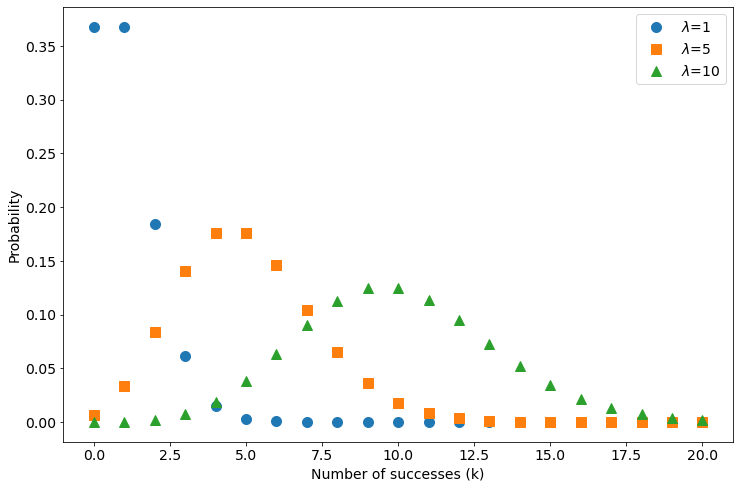

In [6]:
## Generating the subplots
fig, ax = plt.subplots(1, 1, figsize=(12,8))

## Generating the PMF for three cases. Note that we use implicit array operations instead of looping through k values.
n1 = 20
k1 = np.arange(n1+1)
rate1 = 1
prob1 = scipy.stats.poisson.pmf(k1, rate1)

n2 = 20
k2 = np.arange(n2+1)
rate2 = 5
prob2 = scipy.stats.poisson.pmf(k2, rate2)

n3 = 20
k3 = np.arange(n3+1)
rate3 = 10
prob3 = scipy.stats.poisson.pmf(k3, rate3)

## Plotting
_ = ax.plot(k1, prob1, '.', ms=20, label='$\lambda$=1')
_ = ax.plot(k2, prob2, 's', ms=10, label='$\lambda$=5')
_ = ax.plot(k3, prob3, '^', ms=10, label='$\lambda$=10')
_ = ax.set_xlabel('Number of successes (k)')
_ = ax.set_ylabel('Probability')
_ = ax.legend()

## We save the figure
fig.savefig('./images/poisson_pmf.pdf')

#### Gaussian distribution

The *Gaussian distribution*, also known as normal distribution, is a continuous and symmetric probability distribution. It is possibly the most useful distribution in science and data science. One of the reasons is due to the fact that averages of samples of observations of random variables independently drawn from independent distributions converge in distribution to the normal -- this is called the central limit theorem, which we will investigate later. Also see [Normal distribution on Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution).

Examples of processes following the Gaussian distribution are:

- The mass of a bag of flour bought at the grocery store
- The distribution of heights of students in a core physics lecture course
- The gravitational constant derived from a pendulum experiment by the 1st year physics students

Let us define the following variables:
    
- $\mu$ the mean of the Gaussian (can be any real number)
- $\sigma$ the standard distribution of the Gaussian (can be any real positive number)

##### Probability density function
The Gaussian distribution (in this case the probability density function) is given by:

\begin{equation}
  P(x; \mu, \sigma) \sim \mathcal{N}(\mu, \sigma^2) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}

##### Important properties

Mean, median, mode: $\mu$

Variance: $\sigma^2$

**Plotting the Gaussian distribution**

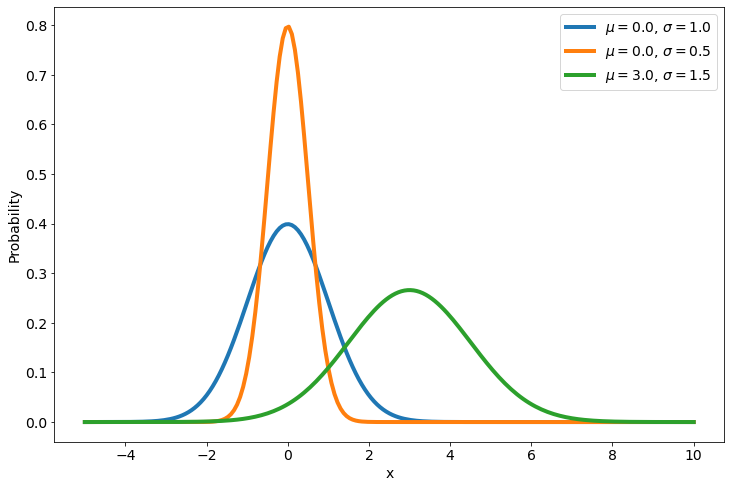

In [7]:
## Generating the subplots
fig, ax = plt.subplots(1, 1, figsize=(12,8))

## Generating the PMF for three cases. Note that we use implicit array operations instead of looping through k values.
mu1 = 0.
sigma1 = 1.
x1 = np.linspace(-5,10,201)
prob1 = scipy.stats.norm.pdf(x1, loc=mu1, scale=sigma1)

mu2 = 0.
sigma2 = 0.5
x2 = np.linspace(-5,10,201)
prob2 = scipy.stats.norm.pdf(x2, loc=mu2, scale=sigma2)

mu3 = 3.
sigma3 = 1.5
x3 = np.linspace(-5,10,201)
prob3 = scipy.stats.norm.pdf(x3, loc=mu3, scale=sigma3)

## Plotting
_ = ax.plot(x1, prob1, '-', lw=4, label='$\mu=0.0$, $\sigma=1.0$')
_ = ax.plot(x2, prob2, '-', lw=4, label='$\mu=0.0$, $\sigma=0.5$')
_ = ax.plot(x3, prob3, '-', lw=4, label='$\mu=3.0$, $\sigma=1.5$')
_ = ax.set_xlabel('x')
_ = ax.set_ylabel('Probability')
_ = ax.legend()

## We save the figure
fig.savefig('./images/gaussian_pdf.pdf')

<div class="example">Example 1</div>

Antropomorphic statistics for the UK report an average adult female height of 161.9 cm with a standard deviation of 6.5 cm. Assuming that these data follow a Gaussian distribution, how likely is it that an adult female would be taller 174.9 cm?

To answer this question, it is useful to recall the value of the following areas covered by various intervals in units of standard deviation. See the figure below.
<img src="images/1920px-Standard_deviation_diagram.svg.png" width="50%">
(Source: [M. W. Toews](https://commons.wikimedia.org/wiki/User:Mwtoews), [Standard deviation diagram](https://commons.wikimedia.org/wiki/File:Standard_deviation_diagram.svg), [CC BY 2.5](https://creativecommons.org/licenses/by/2.5/legalcode))

The question is therefore $P({\rm height} > 174.9 \mid \mu = 161.9, \sigma = 6.5)$. We can quickly realise that $174.9 - 161.9 = 13$, which is exactly $2 \times 6.5 = 2 \sigma$. Therefore, the probability is the area in the upper tail above $2\sigma$, which is $2.1 + 0.1 = 2.2\%$ (the exact answer, without rounding up is actually 2.28%).

_**Note**: any Physics student should know the area under the curve for the key 1, 2 and 3 $\sigma$ intervals of the Gaussian distribution. Alternatively, it may be easier to remember that the area between $\pm 1$, $\pm 2$ and $\pm 3 \sigma$ are respectively $68.26$, $95.44$ and $99.72\%$._

### 2.2.3 Gaussian distribution as a limit of Binomial and Poisson distributions

#### From Binomial to Poisson

The Poisson distribution can be understood as an extension of the binomial distribution where the number of trials is unknown and events can be seen as discrete in a continuous interval. Think, for instance, about rolling a dice vs lightning flashes. In the former case it is possible to define trials (i.e. rolling the dice) whereas in the former case we can record events (the time of a flash) in a continuum of time.

In the above situation, we can write the event rate $\lambda$ as the probability of an event $p$ taking place over an interval of $n$ events, that is $\lambda = np$. Solving for $p$ and substituting into the binomial equation

\begin{equation}
  P(k; n, \lambda/n) = \frac{\lambda^k}{n^k} \left( 1 - \frac{\lambda}{n} \right)^{n-k} \frac{n!}{k!(n-k)!} \,.
\end{equation}

As $n \to \infty$ (i.e. we make the number of intervals very large so get into a continuum)

\begin{equation}
  P(k; n, \lambda/n) = \frac{\lambda^k}{k!} \lim_{n \to \infty} \left( \frac{1}{n^k} \right) \left( \frac{n!}{(n-k)!} \right) \left( 1 - \frac{\lambda}{n} \right)^{n} \left( 1 - \frac{\lambda}{n} \right)^{-k} \,.
\end{equation}

Considering the second term

\begin{equation}
  \lim_{n \to \infty} \frac{n!}{(n-k)!} = \lim_{n \to \infty} n(n-1)(n-2)...(n-k+1) = n^k \,,
\end{equation}

where the middle equality comprises $k$ elements. This result will cancel with the first term from above.

Recalling the definition of the $e$ (see <a href="https://en.wikipedia.org/wiki/E_(mathematical_constant)">Wikipedia</a>) as the limit

\begin{equation}
  e = \lim_{x \to \infty} \left( 1 + \frac{1}{x} \right)^{x} \,,
\end{equation}

and making the variable change $x = -n/\lambda$, the third term becomes

\begin{equation}
  \lim_{n \to \infty} \left( 1 - \frac{\lambda}{n} \right)^{n} = \lim_{x \to \infty} \left( 1 + \frac{1}{x} \right)^{x (-\lambda)} = e^{-\lambda} \,.
\end{equation}

Considering the last term

\begin{equation}
  \lim_{n \to \infty} \left( 1 - \frac{\lambda}{n} \right)^{-k} = 1^{-k} = 1 \,.
\end{equation}

Putting them together

\begin{equation}
  P(k; \lambda) = e^{-\lambda} \frac{\lambda^k}{k!} \,,
\end{equation}

which is just the Poisson distribution.

#### From Poisson to Gaussian and Binomial to Gaussian

Both Binomial and Poisson distribution turn into Gaussian distributions in the limit where $n$ and $\lambda$ are infinity.

<img src="images/stats triad.pdf" width="40%">

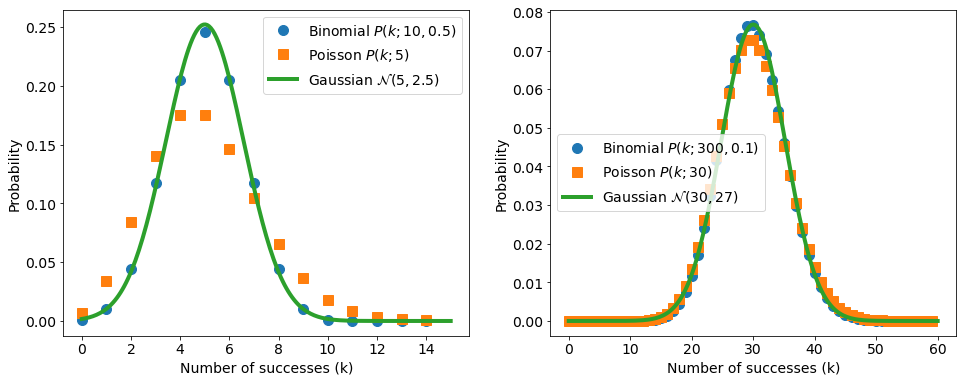

In [8]:
## Generating the subplots
fig, ax = plt.subplots(1, 2, figsize=(16,6))

## Generating the PMF for three cases (binomial, Poisson and Gaussian).
n1 = 10
p1 = 0.5
k1 = np.arange(n1*p1*3)
binom1 = scipy.stats.binom.pmf(k1, n1, p1)

rate1 = n1*p1
poisson1 = scipy.stats.poisson.pmf(k1, rate1)

mu1 = n1*p1
sigma1 = np.sqrt(n1*p1*(1-p1))
x1 = np.linspace(0,n1*p1*3,201)
gauss1 = scipy.stats.norm.pdf(x1, loc=mu1, scale=sigma1)

## Plotting
_ = ax[0].plot(k1, binom1, '.', ms=20, label='Binomial $P(k;10,0.5)$')
_ = ax[0].plot(k1, poisson1, 's', ms=10, label='Poisson $P(k;5)$')
_ = ax[0].plot(x1, gauss1, '-', lw=4, label='Gaussian $\mathcal{N}(5,2.5)$')
_ = ax[0].set_xlabel('Number of successes (k)')
_ = ax[0].set_ylabel('Probability')
_ = ax[0].legend()

## Generating the PMF for three cases (binomial, Poisson and Gaussian).
n2 = 300
p2 = 0.1
k2 = np.arange(n2*p2*2)
binom2 = scipy.stats.binom.pmf(k2, n2, p2)

rate2 = n2*p2
poisson2 = scipy.stats.poisson.pmf(k2, rate2)

mu2 = n2*p2
sigma2 = np.sqrt(n2*p2*(1-p2))
x2 = np.linspace(0,n2*p2*2,201)
gauss2 = scipy.stats.norm.pdf(x2, loc=mu2, scale=sigma2)

## Plotting
_ = ax[1].plot(k2, binom2, '.', ms=20, label='Binomial $P(k;300,0.1)$')
_ = ax[1].plot(k2, poisson2, 's', ms=10, label='Poisson $P(k;30)$')
_ = ax[1].plot(x2, gauss2, '-', lw=4, label='Gaussian $\mathcal{N}(30,27)$')
_ = ax[1].set_xlabel('Number of successes (k)')
_ = ax[1].set_ylabel('Probability')
_ = ax[1].legend()

## We save the figure
fig.savefig('./images/gaussian_limit.pdf')

Without going into the full derivations, we can empirically see that from plots of the distributions. The full mathematical proof relates to the _central limit theorem_ (Chapter 3), but is beyond the scope of this course.

### 2.2.4 Other probability distributions

There are many more types of one-dimensional distributions. Here are some examples:

#### Uniform

Appears as a rather trivial distribution, where all values in an interval have equal probabilities. This is the basis of Monte Carlo techniques, and various sampling techniques.

#### Chi-squared ($\chi^2$)

The distribution of a sum of the squares of k independent standard normal random variables. Used for hypothesis testing (such as performing a linear regression).

#### Student's t-distribution

Frequency distribution of standard deviations of samples drawn from a normal population. Arises when estimating the mean of a normally distributed population in situations where the sample size is small and population standard deviation is unknown.

#### F-distribution

Distribution that arises when comparing statistical models that have been fitted to a data set, in order to identify the model that best fits the population from which the data were sampled. Typically involves data fitted with least squares.

#### Multivariate Gaussian

The *multivariate Gaussian* (or multivariate normal) is a generalization of the one-dimensional (univariate) normal distribution to higher dimensions. It is highly important for likelihood/Bayesian analysis.

*Note: the full matrix formulation from below is provided as a learning supplement. In this course we will limit ourselves to the 1D and 2D Gaussiances, for which an explicit formula can be written as further below. Question to tease your brain: what would the explicit formula for a 3D Gaussian look like? (hint: compare the 1D and the 2D versions)*

\begin{equation}
  f(\underline{x}; \underline{\mu}, \underline{\underline{\Sigma}}) = \mathcal{N}_k(\underline{\mu}, \underline{\underline{\Sigma}}) = \frac{\exp\left(-\frac 1 2 (\underline{x}-\underline{\mu})^\mathrm{T}\underline{\underline{\Sigma}}^{-1}(\underline{x}-\underline{\mu})\right)}{\sqrt{(2\pi)^k \left| \underline{\underline{\Sigma}} \right|}}
\end{equation}

where:

$k$ is the number of dimensions

$\underline{x}$ is a $k$-dimension column vector

$\underline{\mu}$ is the $k$-dimension vector of means

$\underline{\underline{\Sigma}}$ is the covariance matrix

$\left| \underline{\underline{\Sigma}} \right| \equiv \operatorname{det}\underline{\underline{\Sigma}}$ is the determinant of $\underline{\underline{\Sigma}}$
<br>
<br>

##### Two-dimensional case
In two dimensions, for the variables $(x,y)$, the covariance matrix can be re-written as:

\begin{equation}
    \underline{\underline{\Sigma}} = 
    \begin{bmatrix}
        \sigma_x^2 & \rho \sigma_x \sigma_y \\
        \rho \sigma_x \sigma_y & \sigma_y^2
    \end{bmatrix} \quad .
\end{equation}

In the above equation, we use the correlation coeffcient $\rho = \frac{\operatorname{cov}(x,z)}{\sigma_x \sigma_y}$ as defined in Chapter 1. Therefore

\begin{equation}
    \underline{\underline{\Sigma}}^{-1} = \frac{1}{\left(1-\rho^2\right)}
    \begin{bmatrix}
        \frac{1}{\sigma_x^2} & \frac{-\rho}{\sigma_x \sigma_y} \\
        \frac{-\rho}{\sigma_x \sigma_y} & \frac{1}{\sigma_y^2}
    \end{bmatrix} \quad ,
\end{equation}

and

\begin{equation}
    \left| \underline{\underline{\Sigma}} \right| = \sigma_x^2 \sigma_y^2 \left(1-\rho^2\right) \quad .
\end{equation}

The row vector $\left( \underline{x}-\underline{\mu} \right)$ is

\begin{equation}
    \left( \underline{x}-\underline{\mu} \right) =
        \begin{bmatrix}
            x - \mu_x \\
            y - \mu_y
        \end{bmatrix} \,.
\end{equation}

Putting it all together, and ensuring that the right order of priority is applied to matrix algebra, one obtains:

\begin{equation}
  f(x,y) = \frac{1}{2 \pi  \sigma_x \sigma_y \sqrt{1-\rho^2}}
    \exp\left(
      -\frac{1}{2(1-\rho^2)}\left[
          \frac{(x-\mu_x)^2}{\sigma_x^2} +
          \frac{(y-\mu_y)^2}{\sigma_y^2} -
          \frac{2\rho(x-\mu_x)(y-\mu_y)}{\sigma_x \sigma_y}
      \right]
    \right)
\end{equation}

<img src="images/MultivariateNormal.png" width=60% >

(Source: [Bscan](https://commons.wikimedia.org/wiki/User:Bscan), [Multivariate normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#/media/File:MultivariateNormal.png), [CC0 1.0 Universal](https://creativecommons.org/publicdomain/zero/1.0/deed.en))


<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>